In [12]:
# traffic sign down
!gdown --id 1ysKr2SJAxGWrdSvoA5fn40jhRQmbPswl
!unzip data.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ysKr2SJAxGWrdSvoA5fn40jhRQmbPswl
To: /content/data.zip
100% 215M/215M [00:00<00:00, 239MB/s]
Archive:  data.zip
replace Train/0/00000_00000_00000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Train/0/00000_00000_00001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Train/0/00000_00000_00002.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [13]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

tf.__version__

'2.8.0'

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import tensorflow.keras.models as Models
import tensorflow.keras.layers as ly
import tensorflow.keras.optimizers as Optimizer
from keras.metrics import Recall
from keras.metrics import Precision
from keras.callbacks import EarlyStopping 

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
import numpy as np
from tqdm import tqdm

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from random import randint
import albumentations as A

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
# import os
# os.chdir('/content/drive/MyDrive/TA/{Set_Your_Path}')

In [16]:
data = []
labels = []

height = 30
width = 30
channels = 3
num_classes = 43

for i in range(num_classes) :
    path = f'./Train/{i}/'
    Class = os.listdir(path)
    for a in Class:
        image = cv2.imread(path + a)
        image_from_array = Image.fromarray(image, 'RGB') #numpy -> image
        size_image = image_from_array.resize((height, width)) 
        data.append(np.array(size_image))
        labels.append(i)

data = np.array(data)
labels = np.array(labels)

In [37]:
def get_images_from_dir(dir="./Train"):
    label_str_to_int = {
        'buildings': 0,
        'forest': 1,
    }
    
    images = []
    label_count = []
    label=[]
    count =0
    # read images
    for label_int in tqdm(os.listdir(dir)):
        image_dir = os.path.join(dir, label_int)
        
        for image_file in os.listdir(image_dir):
            count += 1
        label.append(int(label_int))
        label_count.append(count)
        count=0
    return label, label_count

In [ ]:
label, count = get_images_from_dir("./Train")
print(label)
print(count)

In [43]:
imagedata = list(zip(label, count))
image_label = pd.DataFrame(data=imagedata, columns = ['label', 'count'])
image_label = image_label.sort_values(by='label')
image_label

,label,count
16,0,180
5,1,1260
13,2,1260
37,3,1260
32,4,1260
41,5,1260
12,6,180
31,7,1260
34,8,1260
25,9,1260


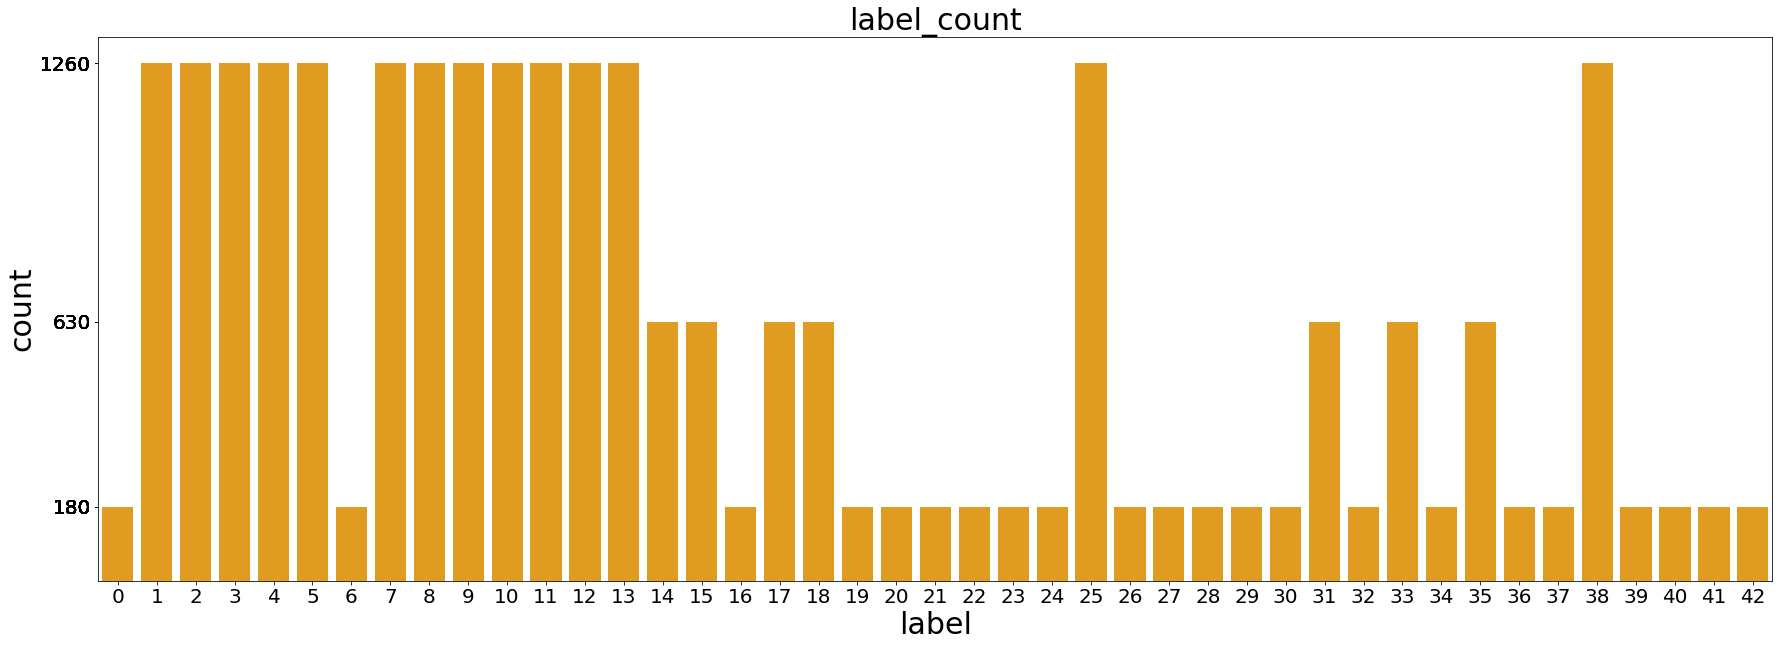

In [64]:
plt.figure(figsize=(30,10))
sns.barplot(x='label', y='count',data=image_label, color='orange')
plt.title('label_count', fontsize=30)
plt.xlabel('label', fontsize=30)
plt.ylabel('count', fontsize=30)
plt.yticks(image_label['count'], fontsize=20)
plt.xticks(image_label['label'], fontsize=20)
plt.show()